# Breast Cancer patients with Malignant and Benign tumor

* Objective : To build a model to find whether breast cancer patient is suffering with Malignant and Benign tumor 
* Data Source: data.csv

#### Importing required libraries

In [34]:
# performing linear algebra 
import numpy as np  
# data processing 
import pandas as pd 
# visualisation 
import matplotlib.pyplot as plt 
import seaborn as sns
#Pre-processing
from sklearn.preprocessing import StandardScaler
#from sklearn.neural_network
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

#### Reading the diabetes dataset :

In [35]:
#displaying first 10 rows of the data.
df = pd.read_csv("data.csv")   
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [36]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### Describing the dataset : 

In [37]:
df.shape

(569, 33)

In [38]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


* The dataset contains 569 rows and 33 columns 

## Data Pre-processing

#### Data Preparation and Cleaning

In [39]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

* The column with 'ID' and the last column do not hold any information/no role in prediction and should be removed. 

In [40]:
df.drop(['Unnamed: 32', 'id'],axis=1,inplace=True)
df.shape

(569, 31)

* In addition, the "diagnosis" - categorical column should be changed to a binary classification. Mapping diagnosis output 'Y' dependent variable ,  = 1 and  = 0

In [41]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [42]:
df.diagnosis = [1 if each == "M" else 0 for each in df.diagnosis] 
df.diagnosis.unique()

array([1, 0])

* There are two outcomes  1 : Malignant and 0 : Benign
* Out of these 569 data points, 212 are labeled as 1 and 357 as 0

In [43]:
print(df.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


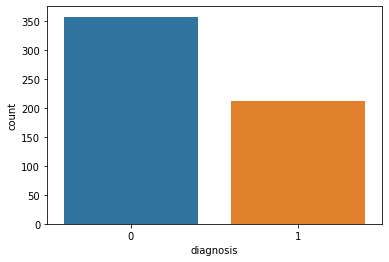

In [44]:
sns.countplot(x='diagnosis',data=df)

In [45]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

* No more missing values. Data is clean now.

### Data Vizualization

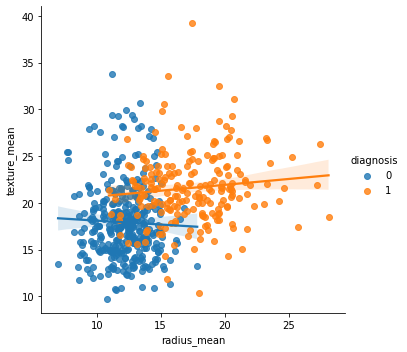

In [46]:
sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = df) 

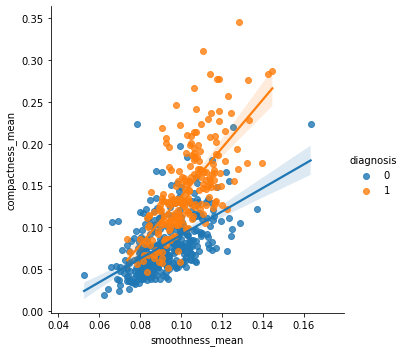

In [47]:
sns.lmplot(x ='smoothness_mean', y = 'compactness_mean',  
           data = df, hue = 'diagnosis') 

##### Heatmap with Pearson Correlation Coefficient for Features

In [ ]:
#fix,ax = plt.subplots(figsize=(25,25))
fix,ax = plt.subplots(figsize=(22,22))
heatmap_data = df
sns.heatmap(heatmap_data.corr(),vmax=1,linewidths=0.01,square=True,annot=True,linecolor="white")
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
heatmap_title='Figure 1:  Heatmap with Pearson Correlation Coefficient for Features'
ax.set_title(heatmap_title)
plt.savefig('Figure1.Heatmap.png',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
#Dropping the Correlated Attributes with Correlation > .95


corr = df.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.95:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df = df[selected_columns]

In [ ]:
#Displaying the Selected Columns after Co-relation

print(selected_columns)

In [ ]:
#Displaying the Shape of the dataframe
df.shape

#### Split Data for Training : Standardize and Split the Data
* Input and output data

In [ ]:
y = df.diagnosis.values 
x_df = df.drop(['diagnosis'], axis = 1) 

In [ ]:
#Standardize Data
scaler = StandardScaler()
X=StandardScaler().fit_transform(x_df.values)
X = pd.DataFrame(X)
X.columns=x_df.columns

### Splitting the data into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [ ]:
#Standardize Data
scaler = StandardScaler()

#Fit on training set only.
scaler.fit(X_train)

#Apply transform to both the training and test set
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

### Split Data for Training: Feature Scaling with PCA

In [24]:
#  Feature Extraction:  Principal Component Analysis: PC1, PC2
pca = PCA(n_components=2, random_state=42) 
# Only fit to the training set
pca.fit((X_train))
# transform with PCA model from training
principalComponents_train = pca.transform(X_train)
principalComponents_test = pca.transform(X_test)

# Use Pandas DataFrame
X_train = pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
X_train.columns=(df.drop(['diagnosis'], axis= 1)).columns
X_test.columns=(df.drop(['diagnosis'], axis= 1)).columns
y_train = pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

X_train['PC1']=principalComponents_train[:,0]
X_train['PC2']=principalComponents_train[:,1]
X_test['PC1']=principalComponents_test[:,0]
X_test['PC2']=principalComponents_test[:,1]

#### Split Data for Training: Verify the Split

In [25]:
print('X_train - length:',len(X_train), 'y_train - length:',len(y_train))
print('X_test - length:',len(X_test),'y_test - length:',len(y_test))
print('Percent heldout for testing:', round(100*(len(X_test)/len(df)),0),'%')

X_train - length: 455 y_train - length: 455
X_test - length: 114 y_test - length: 114
Percent heldout for testing: 20.0 %


## Data Modelling 

##### Machine Learning : Applying neural network model

In [26]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
#classifier.add(Dense(units = 30, kernel_initializer = 'uniform', activation = 'relu'))
#classifier.add(Dropout(rate = 0.1))

# Adding the second hidden layer
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 25))
classifier.add(Dropout(rate = 0.1))

# Adding the third hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.1))


# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                416       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [27]:
classifier.fit(X_train, y_train, validation_data=(X_test,y_test),batch_size=100, epochs=150)

Train on 455 samples, validate on 114 samples
Epoch 1/150
455/455 [==============================] - 0s 457us/step - loss: 0.6928 - accuracy: 0.6198 - val_loss: 0.6921 - val_accuracy: 0.6404
Epoch 2/150
455/455 [==============================] - 0s 18us/step - loss: 0.6917 - accuracy: 0.6352 - val_loss: 0.6908 - val_accuracy: 0.6491
Epoch 3/150
455/455 [==============================] - 0s 18us/step - loss: 0.6903 - accuracy: 0.6484 - val_loss: 0.6890 - val_accuracy: 0.6667
Epoch 4/150
455/455 [==============================] - 0s 18us/step - loss: 0.6883 - accuracy: 0.6857 - val_loss: 0.6866 - val_accuracy: 0.7281
Epoch 5/150
455/455 [==============================] - 0s 23us/step - loss: 0.6856 - accuracy: 0.7385 - val_loss: 0.6831 - val_accuracy: 0.7895
Epoch 6/150
455/455 [==============================] - 0s 21us/step - loss: 0.6817 - accuracy: 0.8044 - val_loss: 0.6782 - val_accuracy: 0.8333
Epoch 7/150
455/455 [==============================] - 0s 19us/step - loss: 0.6762 - accu

455/455 [==============================] - 0s 20us/step - loss: 0.0931 - accuracy: 0.9736 - val_loss: 0.0980 - val_accuracy: 0.9561
Epoch 58/150
455/455 [==============================] - 0s 20us/step - loss: 0.1005 - accuracy: 0.9714 - val_loss: 0.0963 - val_accuracy: 0.9561
Epoch 59/150
455/455 [==============================] - 0s 17us/step - loss: 0.0903 - accuracy: 0.9758 - val_loss: 0.0948 - val_accuracy: 0.9561
Epoch 60/150
455/455 [==============================] - 0s 19us/step - loss: 0.0933 - accuracy: 0.9758 - val_loss: 0.0937 - val_accuracy: 0.9561
Epoch 61/150
455/455 [==============================] - 0s 21us/step - loss: 0.0929 - accuracy: 0.9736 - val_loss: 0.0930 - val_accuracy: 0.9561
Epoch 62/150
455/455 [==============================] - 0s 18us/step - loss: 0.0977 - accuracy: 0.9736 - val_loss: 0.0925 - val_accuracy: 0.9561
Epoch 63/150
455/455 [==============================] - 0s 19us/step - loss: 0.0894 - accuracy: 0.9736 - val_loss: 0.0921 - val_accuracy: 0.956

455/455 [==============================] - 0s 17us/step - loss: 0.0632 - accuracy: 0.9758 - val_loss: 0.0730 - val_accuracy: 0.9737
Epoch 114/150
455/455 [==============================] - 0s 17us/step - loss: 0.0578 - accuracy: 0.9846 - val_loss: 0.0729 - val_accuracy: 0.9737
Epoch 115/150
455/455 [==============================] - 0s 19us/step - loss: 0.0583 - accuracy: 0.9824 - val_loss: 0.0729 - val_accuracy: 0.9737
Epoch 116/150
455/455 [==============================] - 0s 19us/step - loss: 0.0619 - accuracy: 0.9780 - val_loss: 0.0730 - val_accuracy: 0.9737
Epoch 117/150
455/455 [==============================] - 0s 19us/step - loss: 0.0619 - accuracy: 0.9824 - val_loss: 0.0729 - val_accuracy: 0.9737
Epoch 118/150
455/455 [==============================] - 0s 18us/step - loss: 0.0580 - accuracy: 0.9824 - val_loss: 0.0731 - val_accuracy: 0.9737
Epoch 119/150
455/455 [==============================] - 0s 20us/step - loss: 0.0551 - accuracy: 0.9846 - val_loss: 0.0730 - val_accuracy:

In [28]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [29]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

In [30]:
print(cm)

[[69  2]
 [ 1 42]]


In [31]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")
print('Precision is:'+str(round(precision_score(y_test, y_pred),2)))
print('Recall is:'+str(round(recall_score(y_test, y_pred, average='binary'),2)))
print('F1 score is:'+str(round(f1_score(y_test, y_pred, average='binary'),2)))


Accuracy: 97.36842105263158%
Precision is:0.95
Recall is:0.98
F1 score is:0.97


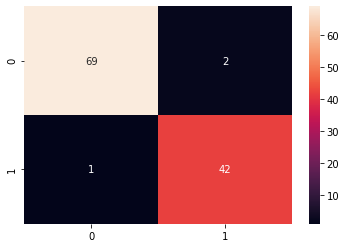

In [32]:
sns.heatmap(cm,annot=True)

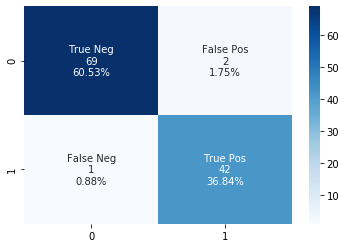

In [33]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')